# Pure persuit!
This code allows the bot to move to desired direction. Using trigonometry and a sheer luck of god knows how the bot will behave

![IMAGE](https://media.discordapp.net/attachments/1024281373726474353/1087800350599303228/IMG_1608.png?width=513&height=335)

*By finding the target angle ( find θ ) and target distance( find direction ). Using trigonometry formula as shown*

*Given the angle of adjacent and opposite is 90'*
$$
TargetDirections= \sqrt{x^2 / y^2}\\
TargetAngle = \arctan{y / x}
$$

# The wheel
![IMAGE2](https://cdn.discordapp.com/attachments/1024281373726474353/1087804569272209489/31npnGIPXL.png)


*Using the standard 58mm Makeblock omni wheel we get circumference by*
$$
WheelCircumference = 2 * \pi * OmniWheelSize/ 2\\
$$
*Followed by an equation as shown*
$$
OmniWheelSize = 58mm\\
WheelCircumference = 2 * \pi * OmniWheelSize/ 2\\
= 2 * \pi * 28\\
= 182.12mm\\
= 18.212cm\\
$$ 

# 180 Smart encoder motor
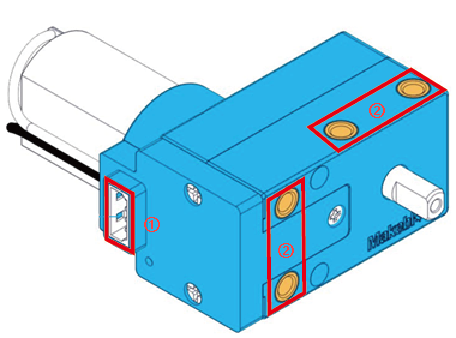

*Find RPM to RPS. For more precise movement distance*
$$
EncoderRpm = 580Rpm\\
EncoderRps = EncoderRpm / 60\\
= 580 / 60\\
= 9.67 Rps\\
$$

*Use motor power by 50% We get equivalent travelled distance by circumference of*
$$
TravelledDistance = WheelCircumference * (EncoderRps * Power\%)\\
= 18.212 * (9.67 * 50\%)\\
= 18.212 * 4.835\\
= 88.05502 cm / sec
$$

In [ ]:

# So we get the code by following
import novapi, time
from mbuild.encoder_motor import encoder_motor_class

en_frontleft = encoder_motor_class("M1","INDEX1")
en_frontright = encoder_motor_class("M2","INDEX1")
en_backleft = encoder_motor_class("M3","INDEX1")
en_backright = encoder_motor_class("M4","INDEX1")

bot_travelled_distance = 0
target = 10 # In CM!

def move(v1, v2, v3, v4):
    en_frontleft.move(v1)
    en_frontright.move(v2)
    en_backleft.move(v3)
    en_backright.move(v4)

def run(target_distance,which):
    if which is 1:
        move_to_pos(target_distance)
    if which is 2:
        move_to_pos_rpm(target_distance)

def move_to_pos(target_distance):
    global bot_travelled_distance
    while bot_travelled_distance is not target_distance:
        move(50, -50, 50, -50)
        bot_travelled_distance += novapi.get_acceleration("y")
    
    move(0,0,0,0)

def move_to_pos_rpm(target_distance):
    wheel_circum = 18
    rpm, rps = 580, 9

    move_duration = ((rps / 2) * wheel_circum) / target_distance
    
    move(50, -50, 50, -50)
    time.sleep(move_duration)
    move(0, 0, 0, 0)

run(target,1) # Change this to 1 or 2. 1 = move_to_pos, 2 = move_to_pos_rpm